## 第4章: Naive-vs-IPS

P229

In [1]:
import matplotlib.pyplot as plt
plt.style.use('ggplot')
import numpy as np
import torch
from torch.optim import Adam
from pytorchltr.datasets import MSLR30K

from model import MLPScoreFunc
from train import train_ranker

In [2]:
# 実験設定
batch_size = 32
hidden_layer_sizes = (10,10)
learning_rate = 0.0001
n_epochs = 100

In [3]:
# MSLR30Kデータセットを読み込む（初回だけ時間がかかる）
train = MSLR30K(split="train") #なかなか謎な形式 #[i]で指定したあとは一応pytorch的なものが扱える
test = MSLR30K(split="test")

In [4]:
train[2].relevance #みたいな

tensor([2, 1, 1, 0, 0, 0, 1, 1, 0, 0, 2, 1, 2, 2, 0, 1, 1, 0, 2, 0, 0, 2, 0, 1,
        1, 2, 0, 2, 1, 2, 1, 0, 4, 2, 2, 0, 4, 0, 0, 2, 1, 2, 0, 1, 1, 2, 1, 3,
        1, 1, 2, 0, 1, 2, 0, 0, 1, 1, 1, 2, 0, 2, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0,
        0, 2, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 2, 2, 0, 4, 0])

## ナイーブ推定量に基づくMLPRankerの学習

In [5]:
torch.manual_seed(12345)
score_fn = MLPScoreFunc(
    input_size=train[0].features.shape[1],
    hidden_layer_sizes=hidden_layer_sizes,
)

optimizer = Adam(score_fn.parameters(), lr=learning_rate)

ndcg_score_list_naive = train_ranker(
    score_fn=score_fn,
    optimizer=optimizer,
    estimator="naive",
    train=train,
    test=test,
    batch_size=batch_size,
    pow_true=1.0, #ポジションバイアスは発生
    n_epochs=n_epochs,
)

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 100/100 [06:45<00:00,  4.05s/it]


## IPS推定量に基づくMLPRankerの学習

In [6]:
torch.manual_seed(12345)
score_fn = MLPScoreFunc(
    input_size=train[0].features.shape[1],
    hidden_layer_sizes=hidden_layer_sizes,
)
optimizer = Adam(score_fn.parameters(), lr=learning_rate)

ndcg_score_list_ips = train_ranker(
    score_fn=score_fn,
    optimizer=optimizer,
    estimator="ips",
    train=train,
    test=test,
    batch_size=batch_size,
    pow_true=1.0,
    n_epochs=n_epochs,
)

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 100/100 [08:06<00:00,  4.87s/it]


## 真の嗜好度合いが観測される場合のMLPRankerの学習

In [7]:
torch.manual_seed(12345)
score_fn = MLPScoreFunc(
    input_size=train[0].features.shape[1],
    hidden_layer_sizes=hidden_layer_sizes,
)
optimizer = Adam(score_fn.parameters(), lr=learning_rate)

ndcg_score_list_ideal = train_ranker(
    score_fn=score_fn,
    optimizer=optimizer,
    estimator="ideal",
    train=train,
    test=test,
    batch_size=batch_size,
    pow_true=1.0,
    n_epochs=n_epochs,
)

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 100/100 [08:28<00:00,  5.09s/it]


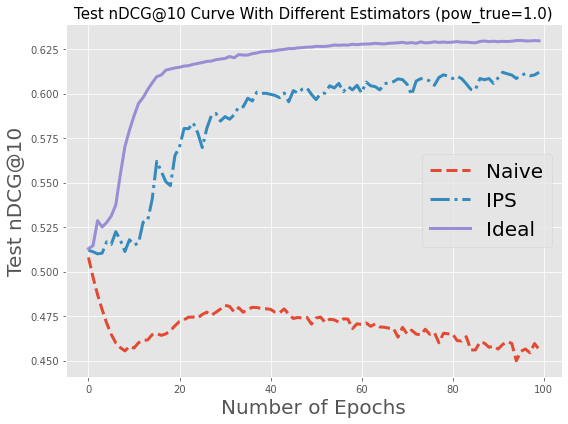

In [8]:
plt.subplots(1, figsize=(8,6))
plt.plot(range(n_epochs), ndcg_score_list_naive, label="Naive", linewidth=3, linestyle="dashed")
plt.plot(range(n_epochs), ndcg_score_list_ips, label="IPS", linewidth=3, linestyle="dashdot")
plt.plot(range(n_epochs), ndcg_score_list_ideal, label="Ideal", linewidth=3)
   
plt.title("Test nDCG@10 Curve With Different Estimators (pow_true=1.0)", fontdict=dict(size=15))
plt.xlabel("Number of Epochs", fontdict=dict(size=20))
plt.ylabel("Test nDCG@10", fontdict=dict(size=20))
plt.tight_layout()
plt.legend(loc="best", fontsize=20)
plt.show()

## ナイーブ推定量に基づくMLPRankerの学習（pow_true=1.5）

In [9]:
torch.manual_seed(12345)
score_fn = MLPScoreFunc(
    input_size=train[0].features.shape[1],
    hidden_layer_sizes=hidden_layer_sizes,
)
optimizer = Adam(score_fn.parameters(), lr=learning_rate)

ndcg_score_list_naive_large_bias = train_ranker(
    score_fn=score_fn,
    optimizer=optimizer,
    estimator="naive",
    train=train,
    test=test,
    batch_size=batch_size,
    pow_true=1.5,
    n_epochs=n_epochs,
)

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 100/100 [07:59<00:00,  4.79s/it]


## IPS推定量に基づくMLPRankerの学習（pow_true=1.5）

In [10]:
torch.manual_seed(12345)
score_fn = MLPScoreFunc(
    input_size=train[0].features.shape[1],
    hidden_layer_sizes=hidden_layer_sizes,
)
optimizer = Adam(score_fn.parameters(), lr=learning_rate)

ndcg_score_list_ips_large_bias = train_ranker(
    score_fn=score_fn,
    optimizer=optimizer,
    estimator="ips",
    train=train,
    test=test,
    batch_size=batch_size,
    pow_true=1.5,
    n_epochs=n_epochs,
)

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 100/100 [06:37<00:00,  3.97s/it]


## 学習曲線の描画（図4.17）

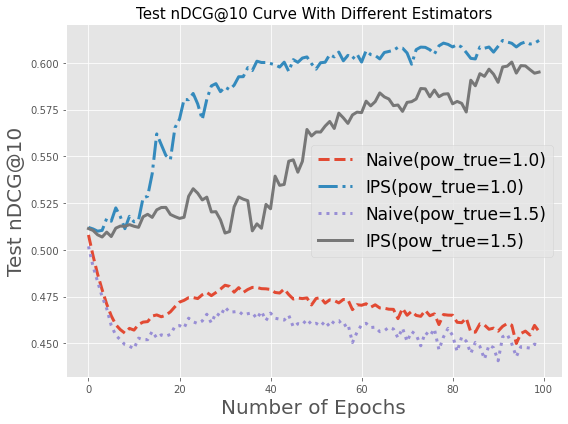

In [11]:
plt.subplots(1, figsize=(8,6))
plt.plot(range(n_epochs), ndcg_score_list_naive, label="Naive(pow_true=1.0)", linewidth=3, linestyle="dashed")
plt.plot(range(n_epochs), ndcg_score_list_ips, label="IPS(pow_true=1.0)", linewidth=3, linestyle="dashdot")
plt.plot(range(n_epochs), ndcg_score_list_naive_large_bias, label="Naive(pow_true=1.5)", linewidth=3, linestyle="dotted")
plt.plot(range(n_epochs), ndcg_score_list_ips_large_bias, label="IPS(pow_true=1.5)", linewidth=3)
   
plt.title("Test nDCG@10 Curve With Different Estimators", fontdict=dict(size=15))
plt.xlabel("Number of Epochs", fontdict=dict(size=20))
plt.ylabel("Test nDCG@10", fontdict=dict(size=20))
plt.tight_layout()
plt.legend(loc="best", fontsize=17)
plt.show()